In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [3]:
# 1. Load Data
df = pd.read_csv("../data/raw/raw_material_data.csv")

print("✅ Data loaded successfully")
print(df.shape)
print(df.head())

✅ Data loaded successfully
(2193, 7)
         Date Material_Name  Quantity_Consumed  Lead_Time  Sales_Volume  \
0  2023-01-01     TMT_Steel                207         12           207   
1  2023-01-01        Cement                148         14           144   
2  2023-01-01          Sand                104         10            96   
3  2023-01-02     TMT_Steel                215         12           206   
4  2023-01-02        Cement                143         14           133   

  Vendor_Name   Location  
0    Vendor_A  Ghaziabad  
1    Vendor_B  Ghaziabad  
2    Vendor_C      Delhi  
3    Vendor_B  Ghaziabad  
4    Vendor_A      Delhi  


In [4]:
# 2. Basic Checks
print("\n--- Null values check ---")
print(df.isnull().sum())

print("\n--- Dtypes check ---")
print(df.dtypes)


--- Null values check ---
Date                 0
Material_Name        0
Quantity_Consumed    0
Lead_Time            0
Sales_Volume         0
Vendor_Name          0
Location             0
dtype: int64

--- Dtypes check ---
Date                 object
Material_Name        object
Quantity_Consumed     int64
Lead_Time             int64
Sales_Volume          int64
Vendor_Name          object
Location             object
dtype: object


In [5]:
# Okay, Date should be datetime (right now it's probably object)
df['Date'] = pd.to_datetime(df['Date'])


In [6]:
# quick duplicate check
print("\n--- Duplicate rows ---")
print(df.duplicated().sum())  # expecting 0


--- Duplicate rows ---
0


In [7]:
# 3. Descriptive Stats
print("\n--- Basic Stats ---")
print(df.describe())


--- Basic Stats ---
                                Date  Quantity_Consumed    Lead_Time  \
count                           2193        2193.000000  2193.000000   
mean   2023-12-31 23:59:59.999999744         149.939808     9.457820   
min              2023-01-01 00:00:00          36.000000     5.000000   
25%              2023-07-02 00:00:00         112.000000     7.000000   
50%              2024-01-01 00:00:00         150.000000     9.000000   
75%              2024-07-02 00:00:00         187.000000    12.000000   
max              2024-12-31 00:00:00         264.000000    14.000000   
std                              NaN          45.760903     2.904372   

       Sales_Volume  
count   2193.000000  
mean     149.559964  
min       38.000000  
25%      113.000000  
50%      149.000000  
75%      187.000000  
max      266.000000  
std       45.937698  


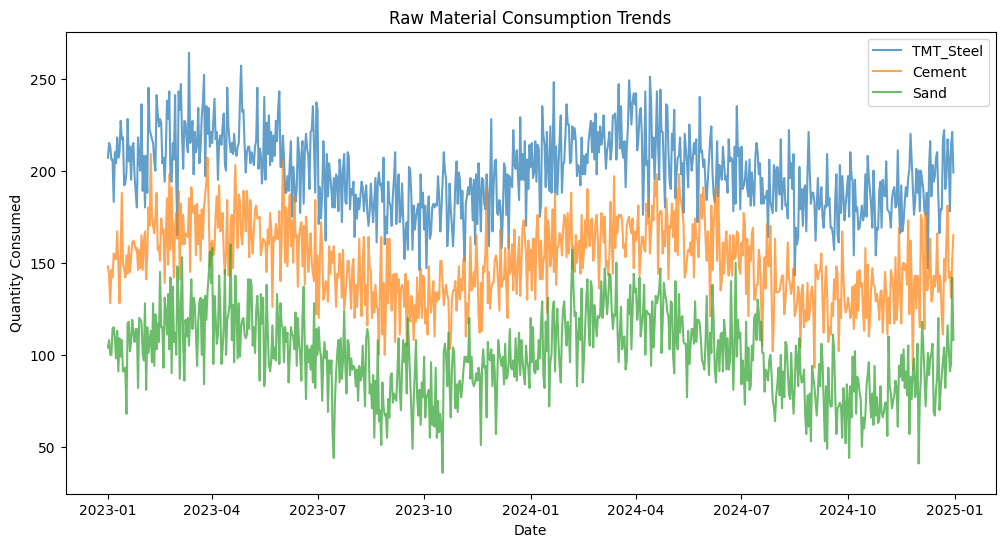

In [8]:
# 4. Plot Demand Trends (per material)
plt.figure(figsize=(12,6))
for mat in df['Material_Name'].unique():
    subset = df[df['Material_Name']==mat]
    plt.plot(subset['Date'], subset['Quantity_Consumed'], label=mat, alpha=0.7)
plt.legend()
plt.title("Raw Material Consumption Trends")
plt.xlabel("Date")
plt.ylabel("Quantity Consumed")
plt.show()


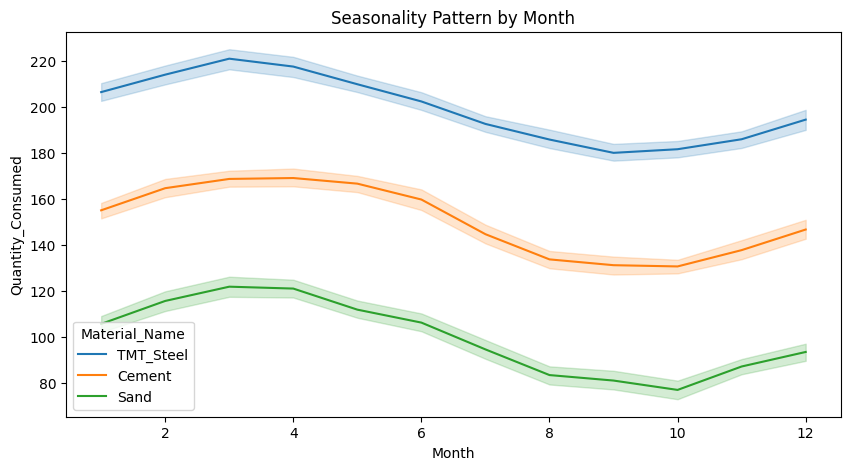

In [9]:
# 5. Seasonality Check (let’s group by month)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(10,5))
sns.lineplot(x="Month", y="Quantity_Consumed", hue="Material_Name", data=df)
plt.title("Seasonality Pattern by Month")
plt.show()


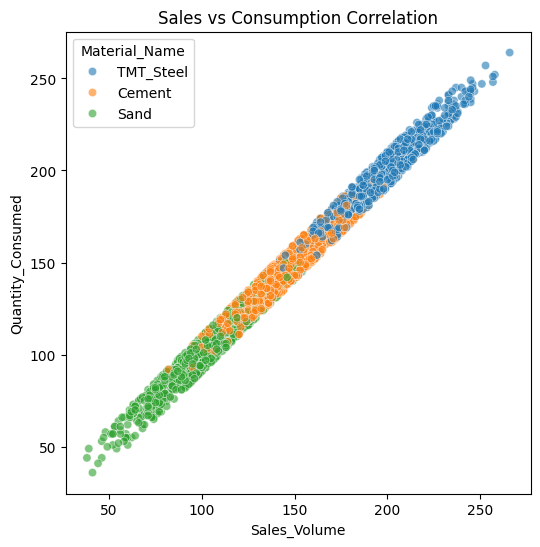


Correlation Matrix:
                   Sales_Volume  Quantity_Consumed
Sales_Volume           1.000000           0.992025
Quantity_Consumed      0.992025           1.000000


In [10]:
# 6. Correlation between Sales and Consumption
plt.figure(figsize=(6,6))
sns.scatterplot(x="Sales_Volume", y="Quantity_Consumed", hue="Material_Name", data=df, alpha=0.6)
plt.title("Sales vs Consumption Correlation")
plt.show()

corr = df[['Sales_Volume','Quantity_Consumed']].corr()
print("\nCorrelation Matrix:")
print(corr)

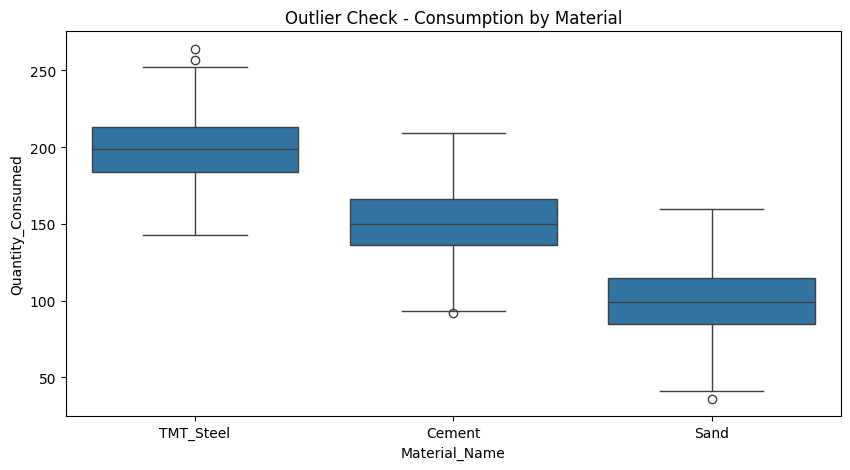

In [11]:
# 7. Outlier Detection (simple boxplot)
plt.figure(figsize=(10,5))
sns.boxplot(x="Material_Name", y="Quantity_Consumed", data=df)
plt.title("Outlier Check - Consumption by Material")
plt.show()


In [12]:
# 8. Save cleaned data (so we can use later in feature engineering)
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/cleaned_data.csv", index=False)
print("✅ Cleaned dataset saved to data/processed/cleaned_data.csv")


✅ Cleaned dataset saved to data/processed/cleaned_data.csv
